In [2]:
#Importing Librraries
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [3]:
#Load the dataset
dataset= pd.read_csv('Fraud_check (2).csv')
dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
dataset2=dataset.rename({'Marital.Status':'MS','Taxable.Income':'Tax','City.Population':'CP','Work.Experience':'WP'},axis=1)

In [ ]:
dataset.columns

In [5]:
dataset2.loc[dataset2.Tax>30000,'Taxincome']='Good'
dataset2.loc[dataset2.Tax<=30000,'Taxincome']='riski'

In [6]:
dataset2.drop('Tax',1,inplace=True)

C:\Users\lenovo1\AppData\Local\Temp/ipykernel_5724/3929150319.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset2.drop('Tax',1,inplace=True)


In [7]:
#Checking null Values
dataset2.isnull().sum()

Undergrad    0
MS           0
CP           0
WP           0
Urban        0
Taxincome    0
dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder() 
dataset2['Undergrad']= label_encoder.fit_transform(dataset2['Undergrad']) 
dataset2['MS']= label_encoder.fit_transform(dataset2['MS'])
dataset2['CP']= label_encoder.fit_transform(dataset2['CP'])
dataset2['Taxincome']= label_encoder.fit_transform(dataset2['Taxincome'])
dataset2['Urban']= label_encoder.fit_transform(dataset2['Urban'])

In [9]:
dataset2

,Undergrad,MS,CP,WP,Urban,Taxincome
0,0,2,84,10,1,0
1,1,0,398,18,1,0
2,0,1,481,30,1,0
3,1,2,574,15,1,0
4,0,1,4,28,0,0
...,...,...,...,...,...,...
595,1,0,55,7,1,0
596,1,0,107,2,1,0
597,0,0,459,0,1,0
598,1,1,533,17,0,0


In [10]:
colnames = list(dataset2.columns)
predictors = colnames[0:5]
target = colnames[5]

In [11]:
target

'Taxincome'

In [16]:
#Deviding the data into X&Y as Target Variable And Predictors
x = dataset2[predictors]
y = dataset2[target]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [17]:
#splitting the data into train & test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [18]:
#Using Entropy Criteria
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

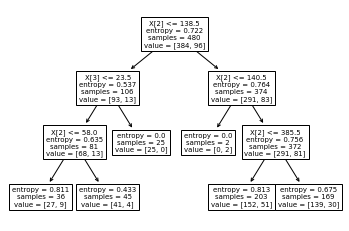

In [20]:
tree.plot_tree(model);

In [21]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [22]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
pd.crosstab(y_test,preds)

col_0,0
Taxincome,
0,92
1,28


In [26]:
np.mean(preds==y_test)

0.7666666666666667

# Decision tree Regression

In [27]:
#Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

In [42]:
array=dataset2.values
X=array[:,:5]
y=array[:,5]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [44]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
#accuracy
model.score(X_test,y_test)

-1.0990506329113927

Hence: The entropy criterria is good for the model